# Car Price Predication

In [278]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

In [279]:
# loading the dataset
df = pd.read_csv(r'C:\Users\Mr Amir Mufti\Downloads\CarPrice_Assignment.csv')

In [280]:
# viewing the dataframe
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [281]:
# checking the shape
df.shape

(205, 26)

In [282]:
# understanding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [283]:
# indentifying null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [284]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Exploratory Data Analysis

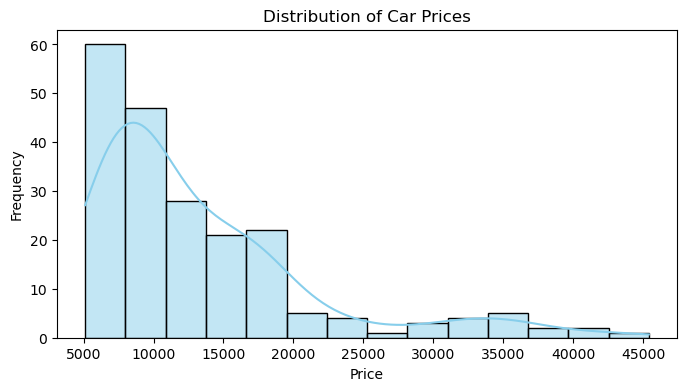

In [285]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True, color="skyblue")
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

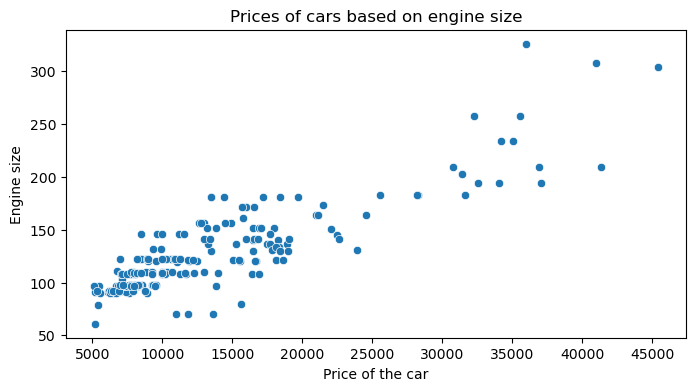

In [286]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='price', y='enginesize')
plt.title('Prices of cars based on engine size')
plt.xlabel('Price of the car')
plt.ylabel('Engine size')
plt.show()

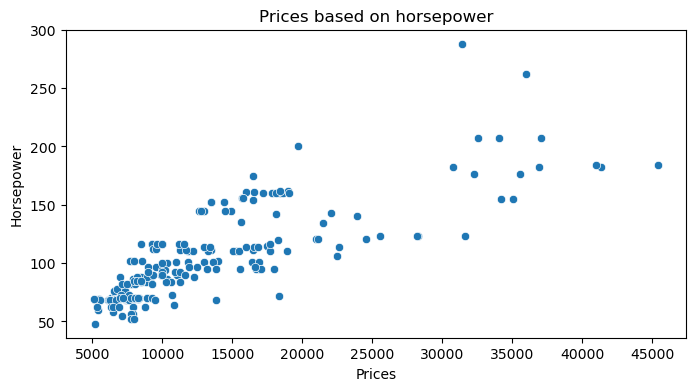

In [287]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='price', y='horsepower')
plt.title('Prices based on horsepower')
plt.xlabel('Prices')
plt.ylabel('Horsepower')
plt.show()

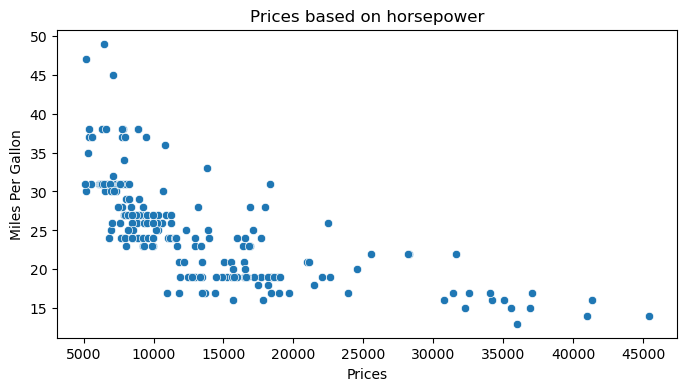

In [288]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='price', y='citympg')
plt.title('Prices based on horsepower')
plt.xlabel('Prices')
plt.ylabel('Miles Per Gallon')
plt.show()

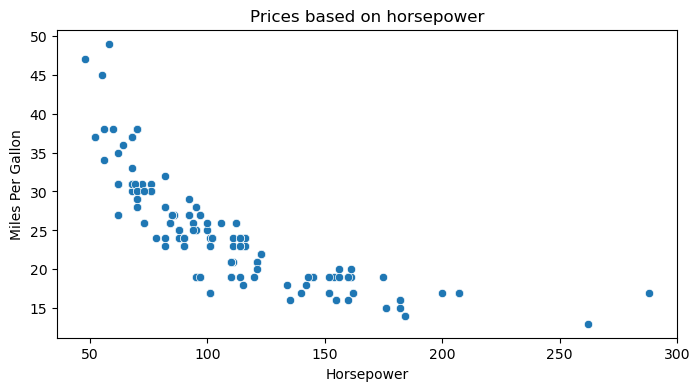

In [289]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='horsepower', y='citympg')
plt.title('Prices based on horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.show()

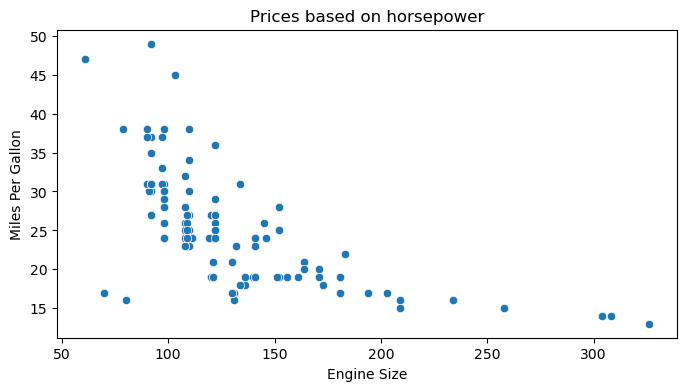

In [290]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='enginesize', y='citympg')
plt.title('Prices based on horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Miles Per Gallon')
plt.show()

##### Price has a positive linear relationship with engine size and horsepower, while negative relationship with miles per gallon.

# Data Wrangling

In [291]:
# checking the mean price
mean_price = df['price'].mean()

In [292]:
# lets identify outliers that are above 3 standard deviation of the mean value
df['price3SD'] = df['price'] + 3*mean_price

In [293]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price3SD
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,53325.131712
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,56330.131712
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,56330.131712
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,53780.131712
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,57280.131712


In [294]:
df[df['price'] > df['price3SD']].head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price3SD


##### No outlier found in 3 Standard Deviation of the mean value

# Feature Engineering

In [295]:
# value counts by group
df.groupby('CarName')['CarName'].agg('count').sort_values(ascending=False)

CarName
peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: CarName, Length: 147, dtype: int64

In [296]:
df[['CarBrand', 'CarModel']] = df['CarName'].str.split(" ", n=1, expand=True)

In [297]:
# dropping the uncessary columns
df = df.drop(['car_ID', 'CarName', 'CarModel'], axis= 1)

In [298]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print()

Unique values in 'symboling':
[ 3  1  2  0 -1 -2]

Unique values in 'fueltype':
['gas' 'diesel']

Unique values in 'aspiration':
['std' 'turbo']

Unique values in 'doornumber':
['two' 'four']

Unique values in 'carbody':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values in 'drivewheel':
['rwd' 'fwd' '4wd']

Unique values in 'enginelocation':
['front' 'rear']

Unique values in 'wheelbase':
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]

Unique values in 'carlength':
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 17

In [299]:
df1 = df.copy()

In [300]:
# Ordinal Encoding for 'symboling'
df['symboling'] = df['symboling'].astype(int)

# Binary Encoding for 'fueltype', 'aspiration', and 'enginelocation'
binary_mappings = {
    'fueltype': {'gas': 0, 'diesel': 1},
    'aspiration': {'std': 0, 'turbo': 1},
    'enginelocation': {'front': 0, 'rear': 1}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

# One-Hot Encoding for categorical columns
one_hot_cols = ['doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype=int)

# Normalization/Scaling for numerical columns
scaler = MinMaxScaler()
numeric_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
                'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [301]:
df.head()

,symboling,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price3SD,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_maxda,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porcshce,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,3,0,0,0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959,53325.131712,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558,56330.131712,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558,56330.131712,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254,53780.131712,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142,57280.131712,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [302]:
df.shape

(205, 72)

# Building Prediction Model

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [304]:
# Droping the extra columns
df = df.loc[:, ~df.columns.str.startswith('CarBrand_')]
df = df.loc[:, ~df.columns.str.startswith('fuelsystem_')]
df = df.loc[:, ~df.columns.str.startswith('enginetype_')]

In [305]:
X = df.drop(['price', 'price3SD'], axis=1)
y= df1.price

In [306]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [308]:
lr_model = LinearRegression()

In [309]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [310]:
y_pred = lr_model.predict(X_test)

In [311]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.832678279501841


In [312]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2430.624818229581


In [313]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 13209049.396626903


#### Other Models Using GridSearchCV

In [314]:
model_params = {
    'LinearRegression': {
        'model' : LinearRegression(),
        'params': {}
    },
    'XGB':{
    'model': xgb.XGBRegressor(),
    'params':{
            'booster': ['gbtree', 'gblinear'],   
            'eta': [0.1, 0.2],    
            'n_estimators' : [50,100],
            'max_depth' : [2,4],
            'learning_rate' : [0.1, 0.05],
            'min_child_weight' : [2,5],
            'lambda': [1.0, 2.0]
            }
        },
        
    'RandomForestRegressor':{
        'model': RandomForestRegressor(),
        'params':{
            'criterion' : ['absolute_error', 'squared_error'],
            'max_depth' : [4, 6],
            'min_samples_leaf': [2, 5]
        }
            },
    'Decision_Tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion' : ['absolute_error', 'squared_error'],
            'max_depth' : [4, 6],
            'min_samples_leaf': [2, 5]
            }                  
        }
    }

In [315]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        })

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mr Amir Mufti\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:17:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_depth

In [316]:
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,LinearRegression,0.833006,{}
1,XGB,0.897052,"{'booster': 'gbtree', 'eta': 0.1, 'lambda': 2...."
2,RandomForestRegressor,0.885582,"{'criterion': 'absolute_error', 'max_depth': 6..."
3,Decision_Tree,0.839150,"{'criterion': 'squared_error', 'max_depth': 6,..."


<Figure size 1000x600 with 0 Axes>

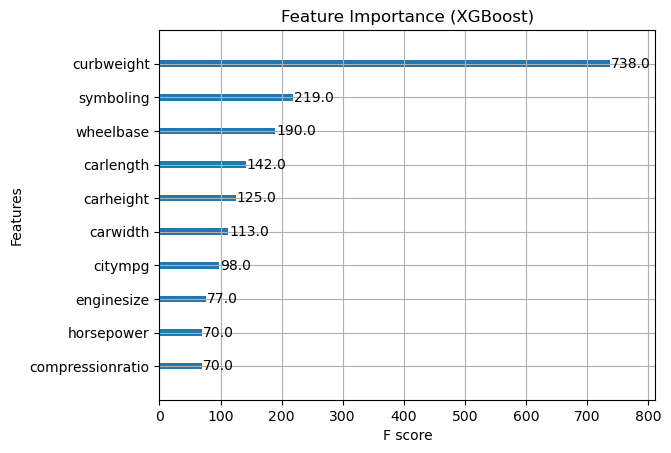

In [317]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type="weight", max_num_features=10)  # Show top 10 features
plt.title("Feature Importance (XGBoost)")
plt.show()


The plot you shared presents the feature importance from an XGBoost model used to predict car prices. It shows how much each feature (predictor variable) contributed to the model's prediction based on their F-scores (frequency and weight). Here's the breakdown of the most important features:
1.	Curweight (curbweight):
o	This feature has the highest importance score (738.0), meaning it played the most significant role in predicting the car price. Curbweight refers to the weight of the car without passengers or cargo, and it is likely to have a strong relationship with the car's overall price.
2.	Symboling:
o	With an importance score of 219.0, symboling likely represents a categorical code related to the car's risk or brand attributes. Higher values might correlate with cars that are higher-priced or considered higher in value.
3.	Wheelbase:
o	Wheelbase, with an importance score of 190.0, is another crucial feature. It refers to the distance between the front and rear axles. Larger wheelbases are often associated with more expensive, larger vehicles.
4.	Car Length (carlength):
o	Car length (importance score of 142.0) indicates how long the car is. Longer cars tend to be higher-priced, especially for luxury or full-size models.
5.	Car Height (carheight):
o	Car height (score 125.0) is less important than car length or wheelbase but still contributes to the model’s prediction. Taller cars, like SUVs, may have a different price range compared to sedans.
6.	Car Width (carwidth):
o	Car width (113.0) is important, reflecting how broad the car is. Wider cars often indicate larger or more luxurious models, which may be priced higher.
7.	City MPG (citympg):
o	With an importance score of 98.0, city MPG (miles per gallon) is related to fuel efficiency. Cars with better fuel efficiency, especially in city driving, could influence price decisions.
8.	Engine Size (enginesize):
o	Engine size (77.0) influences the power and performance of the car, which affects the price. Larger engines are often found in more expensive vehicles.
9.	Horsepower:
o	Horsepower (70.0) is a measure of the engine's power, and this can influence the car's price, particularly in sports or luxury cars.
10.	Compression Ratio:
•	Compression ratio (70.0) plays a smaller role in determining car prices but might still impact the engine's efficiency and performance, particularly for higher-end or performance cars.
Conclusion:
The feature importance plot shows that the weight, dimensions, and performance-related features (curbweight, symboling, wheelbase, carlength, carheight, carwidth) are key drivers in predicting car prices. Performance-related features like engine size, horsepower, and fuel efficiency (citympg) also contribute but are less influential than the physical characteristics of the car.

